## Resources: 

Keras Models https://keras.io/api/applications/
<br>
TensorFlow Models https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/tf2_detection_zoo.md
<br><br>

COCO dataset official website: https://cocodataset.org/
<br>
ImageNet dataset 1000 classes: https://deeplearning.cms.waikato.ac.nz/user-guide/class-maps/IMAGENET/
<br><br>
Food101 Dataset(where sambosa dataset is from) https://www.kaggle.com/datasets/kmader/food41


<br><br>



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Task 1: Trying Out a Pretrained Model ( MobileNetV2 )

In [ ]:
#!pip3 install tensorflow
#!pip3 install keras
#!pip3 install numpy

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from keras.applications.mobilenet_v2 import MobileNetV2 
import numpy as np

model = MobileNetV2(weights='imagenet')
model.summary()


Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_9[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

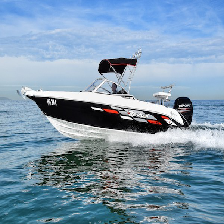

In [ ]:
from keras.utils import load_img, img_to_array 
from keras.applications.mobilenet_v2 import preprocess_input

image = load_img('/content/drive/MyDrive/try/boat.jpg', target_size=(224, 224))
image



In [ ]:
image_arr = img_to_array(image)
print("the shape of the image:" ,  np.shape(image_arr), "\n")
print("the image as an array: \n" , image_arr)


the shape of the image: (224, 224, 3) 

the image as an array: 
 [[[113. 163. 226.]
  [114. 162. 226.]
  [117. 165. 227.]
  ...
  [ 82. 141. 217.]
  [ 82. 141. 219.]
  [ 79. 138. 216.]]

 [[115. 164. 231.]
  [116. 165. 231.]
  [117. 166. 232.]
  ...
  [ 83. 142. 220.]
  [ 80. 139. 217.]
  [ 78. 137. 215.]]

 [[109. 159. 230.]
  [110. 160. 229.]
  [109. 159. 228.]
  ...
  [ 82. 141. 221.]
  [ 82. 141. 221.]
  [ 76. 135. 215.]]

 ...

 [[ 27.  83. 100.]
  [ 31.  87. 104.]
  [ 34.  90. 107.]
  ...
  [ 97. 147. 170.]
  [ 98. 148. 171.]
  [ 80. 130. 153.]]

 [[ 50. 107. 126.]
  [ 42.  97. 117.]
  [ 37.  93. 110.]
  ...
  [114. 143. 175.]
  [112. 141. 173.]
  [116. 145. 177.]]

 [[ 44. 101. 121.]
  [ 42.  99. 118.]
  [ 34.  89. 109.]
  ...
  [ 49.  95. 121.]
  [ 50.  96. 122.]
  [ 55. 101. 127.]]]


In [ ]:

image_arr = image_arr.reshape(1,224,224,3)  
# or --> image_arr = np.expand_dims(image_arr, axis=0) 
print("after changing the image's shape :" ,  np.shape(image_arr), "\n")

image_arr = preprocess_input(image_arr) #values are scaled between -1 and 1
print("the image as an array after preprocessing:" ,  image_arr )


after changing the image's shape : (1, 224, 224, 3) 

the image as an array after preprocessing: [[[[-0.11372548  0.27843142  0.77254903]
   [-0.10588235  0.27058828  0.77254903]
   [-0.08235294  0.2941177   0.78039217]
   ...
   [-0.35686272  0.10588241  0.7019608 ]
   [-0.35686272  0.10588241  0.7176471 ]
   [-0.38039213  0.082353    0.69411767]]

  [[-0.09803921  0.28627455  0.8117647 ]
   [-0.09019607  0.2941177   0.8117647 ]
   [-0.08235294  0.30196083  0.81960785]
   ...
   [-0.3490196   0.11372554  0.7254902 ]
   [-0.372549    0.09019613  0.7019608 ]
   [-0.38823527  0.07450986  0.6862745 ]]

  [[-0.14509803  0.24705887  0.8039216 ]
   [-0.1372549   0.254902    0.79607844]
   [-0.14509803  0.24705887  0.7882353 ]
   ...
   [-0.35686272  0.10588241  0.73333335]
   [-0.35686272  0.10588241  0.73333335]
   [-0.40392154  0.05882359  0.6862745 ]]

  ...

  [[-0.7882353  -0.3490196  -0.21568626]
   [-0.75686276 -0.31764704 -0.18431371]
   [-0.73333335 -0.29411763 -0.1607843 ]
   ...
 

In [ ]:
from keras.applications.vgg16 import decode_predictions

result = model.predict(image_arr)


for name, desc, score in decode_predictions(result)[0]:
    print(desc, "- %.2f"%(score*100) ,"%")
#(class, description, probability)

1/1 [==============================] - 1s 777ms/step
speedboat - 89.54 %
lifeboat - 1.82 %
amphibian - 0.47 %
trimaran - 0.32 %
catamaran - 0.23 %


# Task 2: Transfer Learning

In [ ]:
from tensorflow.keras.applications import VGG16

base = VGG16(weights='imagenet', input_shape=(224, 224, 3),include_top=False)
base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
# FREEZE THE LAYERS AND WEIGHTS

base.trainable = False

In [ ]:
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import GlobalAveragePooling2D , Dense

input_layer = Input(shape=(224, 224, 3))
x = base(input_layer, training=False)
x = GlobalAveragePooling2D()(x)
final_layer = Dense(1)(x) #why 1? 
model = Model(input_layer, final_layer)

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d_1   (None, 512)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_1 (Dense)             (None, 1)                 513       
                                                                 
Total params: 14,715,201
Trainable params: 513
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import BinaryAccuracy

#BINARY
model.compile(loss=BinaryCrossentropy(from_logits=True), metrics=[BinaryAccuracy()])

## Data Agumentation

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

aggtrain = ImageDataGenerator(
    samplewise_center=True, #set the mean to zero for each individual sample  
    horizontal_flip=True,   
    width_shift_range=0.1, 
    height_shift_range=0.1,  
)  

aggvalid = ImageDataGenerator(samplewise_center=True)

In [ ]:

train1 = aggtrain.flow_from_directory(
    "/content/drive/MyDrive/data/train",
    target_size=(224, 224),
    color_mode="rgb", 
    class_mode="binary",
    batch_size=8, #defaults 32 or 64
)

# load and iterate validation dataset
valid1 = aggvalid.flow_from_directory(
    "/content/drive/MyDrive/data/val",
    target_size=(224, 224),
    color_mode="rgb",
    class_mode="binary",
    batch_size=8,
)

Found 147 images belonging to 2 classes.
Found 63 images belonging to 2 classes.


In [ ]:
#steps_per_epoch is the total number of training samples divided by the specifed batch size
# steps_per_epoch = training samples/batch
ep = 10
model.fit(train1, steps_per_epoch=147/8, validation_data=valid1, validation_steps=4, epochs=ep)

Epoch 1/10
18/18 [==============================] - 4s 169ms/step - loss: 2.0113 - binary_accuracy: 0.3946 - val_loss: 1.2962 - val_binary_accuracy: 0.6250
Epoch 2/10
18/18 [==============================] - 3s 154ms/step - loss: 1.2799 - binary_accuracy: 0.5170 - val_loss: 1.3657 - val_binary_accuracy: 0.4688
Epoch 3/10
18/18 [==============================] - 3s 179ms/step - loss: 0.9619 - binary_accuracy: 0.6667 - val_loss: 0.9723 - val_binary_accuracy: 0.6250
Epoch 4/10
18/18 [==============================] - 5s 249ms/step - loss: 0.7376 - binary_accuracy: 0.7347 - val_loss: 0.4640 - val_binary_accuracy: 0.7188
Epoch 5/10
18/18 [==============================] - 5s 275ms/step - loss: 0.6696 - binary_accuracy: 0.7551 - val_loss: 0.9407 - val_binary_accuracy: 0.6250
Epoch 6/10
18/18 [==============================] - 4s 234ms/step - loss: 0.4946 - binary_accuracy: 0.8027 - val_loss: 0.9160 - val_binary_accuracy: 0.6562
Epoch 7/10
18/18 [==============================] - 3s 147ms/ste

## FINE - TUNING

In [ ]:
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import BinaryAccuracy
from tensorflow.keras.optimizers import Adam

# UNFREEZE
base.trainable = True

model.compile(optimizer=Adam(learning_rate = .00001), loss=BinaryCrossentropy(from_logits=True), metrics=[BinaryAccuracy()])

#learning rates should be low, why?

In [ ]:
ep = 10
model.fit(train1, steps_per_epoch=147/8, validation_data=valid1, validation_steps=4, epochs=ep)

Epoch 1/10
18/18 [==============================] - 5s 193ms/step - loss: 0.4629 - binary_accuracy: 0.8299 - val_loss: 0.9224 - val_binary_accuracy: 0.7188
Epoch 2/10
18/18 [==============================] - 3s 180ms/step - loss: 0.2035 - binary_accuracy: 0.9048 - val_loss: 0.2824 - val_binary_accuracy: 0.9375
Epoch 3/10
18/18 [==============================] - 3s 180ms/step - loss: 0.0236 - binary_accuracy: 0.9932 - val_loss: 0.3897 - val_binary_accuracy: 0.9062
Epoch 4/10
18/18 [==============================] - 3s 180ms/step - loss: 0.0488 - binary_accuracy: 0.9796 - val_loss: 0.0373 - val_binary_accuracy: 1.0000
Epoch 5/10
18/18 [==============================] - 3s 181ms/step - loss: 0.0113 - binary_accuracy: 0.9932 - val_loss: 0.1944 - val_binary_accuracy: 0.9375
Epoch 6/10
18/18 [==============================] - 3s 185ms/step - loss: 0.0059 - binary_accuracy: 1.0000 - val_loss: 0.1174 - val_binary_accuracy: 0.9688
Epoch 7/10
18/18 [==============================] - 3s 181ms/ste

In [ ]:
model.evaluate(valid1, steps=valid1.samples/valid1.batch_size) #[loss precentage , accuracy precentage]


7/7 [==============================] - 1s 59ms/step - loss: 0.3315 - binary_accuracy: 0.9365


[0.3315311670303345, 0.9365079402923584]

In [ ]:
from tensorflow.keras.preprocessing import image as image_utils
from tensorflow.keras.applications.imagenet_utils import preprocess_input

image  = image_utils.load_img('/content/drive/MyDrive/try/mysambosa.jpeg', target_size=(224, 224))
image_arr  = image_utils.img_to_array(image)
image_arr  = image_arr.reshape(1,224,224,3)
image_arr  = preprocess_input(image_arr)
result = model.predict(image_arr)

print(result) #positive means first class while negative number is the second class

1/1 [==============================] - 0s 229ms/step
[[14.4538355]]


In [ ]:

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing import image as image_utils
from tensorflow.keras.applications.imagenet_utils import preprocess_input

def show_pretty_results(image_path):
    image  = image_utils.load_img(image_path, target_size=(224, 224))
    image_arr  = image_utils.img_to_array(image)
    image_arr  = image_arr.reshape(1,224,224,3)
    image_arr  = preprocess_input(image_arr)
    result = model.predict(image_arr)
    if result > 0:
      print("سمبووووسه")
    else:
      print("مو سمبووسه")
    plt.imshow(image)
    


1/1 [==============================] - 0s 17ms/step
سمبووووسه


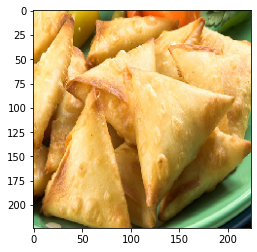

In [ ]:
show_pretty_results('/content/drive/MyDrive/try/mysambosa.jpeg')

1/1 [==============================] - 0s 16ms/step
مو سمبووسه


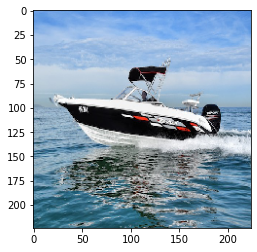

In [ ]:
show_pretty_results('/content/drive/MyDrive/try/boat.jpg')

# END

Notebook By: Joud AlJalaoud 
:)